# (Deep) CNNs for Image Colorization
#### Using convolutional neural network for image colorization which turns a grayscale image to a colored image.5 By converting an image to grayscale, we loose color information, so converting a grayscale image back to a colored version is not an easy job. We will use the CIFAR-10 dataset. Downolad the dataset from http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz.


#### From the train and test dataset, extracting the class birds. (class with 6000 members)

In [1]:
%matplotlib inline
import urllib # to read the data directly from url
from urllib import request
import re
import io
import numpy as np
import pandas as pd
import keras
import cv2
import numpy
import sys



from keras.layers import LSTM
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from tensorflow.keras import backend
from tensorflow.python.framework import ops
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense
from keras.datasets import cifar10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#from skimage.color import rgb2grey

from keras.models import Sequential



Using TensorFlow backend.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [188]:
def fileReader(dataBatch):
    import pickle
    with open(dataBatch, 'rb') as fo:
        encoded_list = pickle.load(fo, encoding='bytes')
    extracted_data = encoded_list[b'data'].reshape((len(encoded_list[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = encoded_list[b'labels']
    return (extracted_data, labels)

def all_dataBatch(data):
    data_ = []
    for i in range(len(data[0])):
        if data[1][i] == 2:
            data_.append(data[0][i])
    return data_

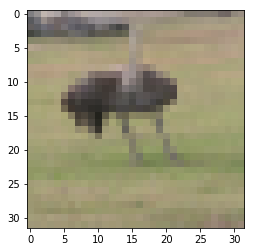

In [189]:
data = []
data_1 = fileReader('data_batch_1');
data += all_dataBatch(data_1) 
data_2 = fileReader('data_batch_2');
data += all_dataBatch(data_2) 
data_3 = fileReader('data_batch_3');
data += all_dataBatch(data_3) 
data_4 = fileReader('data_batch_4');
data += all_dataBatch(data_4) 
data_5 = fileReader('data_batch_5');
data += all_dataBatch(data_5) 
test_data = fileReader('test_batch')
data += all_dataBatch(test_data)


np.array(data).shape


plt.imshow(data[5])

pixel_list = np.reshape(data, (6144000, 3))

#### Those 6000 images have 6000 × 32 × 32 pixels. Choosing 10% of the pixels randomly. Each pixel is an RGB vector with three elements.

#### Run k-means clustering on the P vectors using k = 4. The centers of the clusters will be the main colors. Converting the colored images to k-color images by converting each pixel’s value to the closest main color in terms of Euclidean distance. These are the outputs of the network, whose each pixel falls in one of those k classes.

#### Using scikit-learn to obtain grayscale 32 × 32 × 1 images from the original 32 × 32 × 3 images. The grayscale images are inputs of your network.

In [191]:
pixel_list = np.reshape(data, (6144000, 3))
kmeans = KMeans(n_clusters=2)
kmeans.fit(pixel_list)
#kmeans.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [192]:
lab = kmeans.predict(pixel_list)
nat = []
Y = []
for ppp in range(len(pixel_list)):
    nat.append([int(op) for op in kmeans.cluster_centers_[lab[ppp]]])
    if lab[ppp] == 0:
        Y.append([1, 0, 0, 0])
    elif lab[ppp] == 1:
        Y.append([0, 1, 0, 0])
    elif lab[ppp] == 2:
        Y.append([0, 0, 1, 0])
    elif lab[ppp] == 3:
        Y.append([0, 0, 0, 1])

#np.shape(nat)
#np.shape(Y)
nat = np.reshape(nat, (6000, 32, 32, 3))
Y = np.reshape(Y, (6000, 32, 32, 4))
from skimage.color import rgb2grey
X = []
pixel_list = np.reshape(pixel_list, (6000, 32, 32, 3))
for i in range(len(pixel_list)):
    X.append(rgb2grey(pixel_list[i]).tolist())
X = np.reshape(X, (6000, 32, 32, 1))

#### Implementing a deep convolutional neural network with two convolution layers (or more) and two (or more) MLP layers


In [194]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
import warnings

def warn_filter():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warn_filter()

model.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Dense(32, activation='softmax'))
model.add(Dense(4, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

#y_train.shape

import warnings
def warn_filter():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warn_filter()
network = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, verbose=2)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense_9 (Dense)              (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_10 (Dense)             (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
_________________________________________________________________
Trai

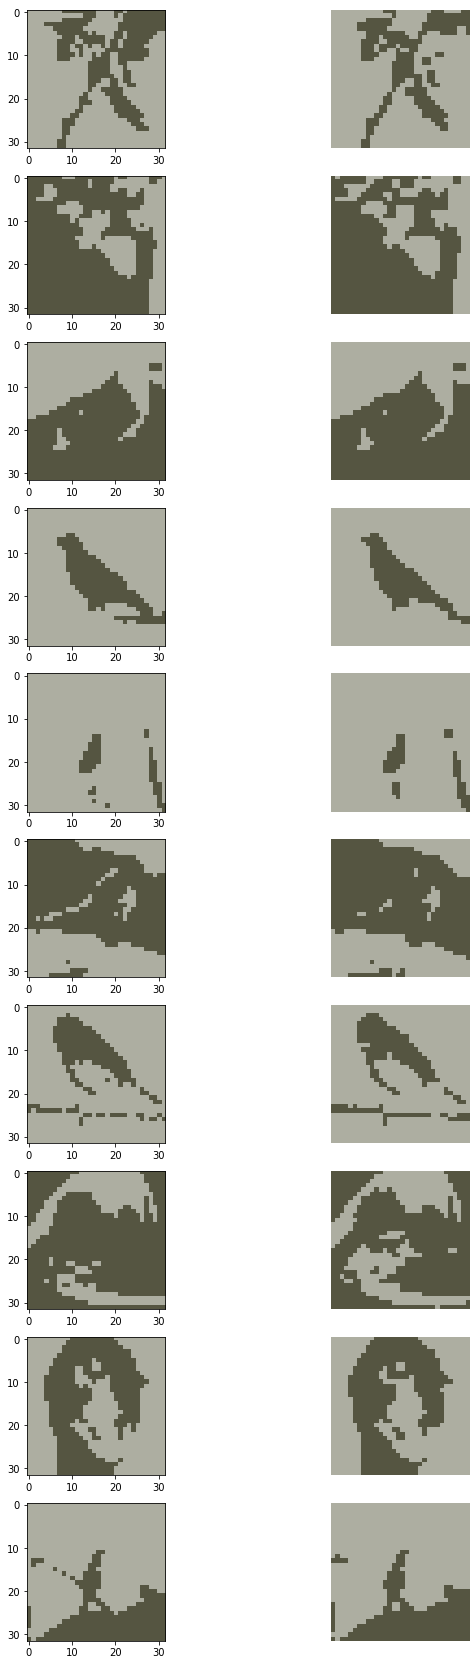

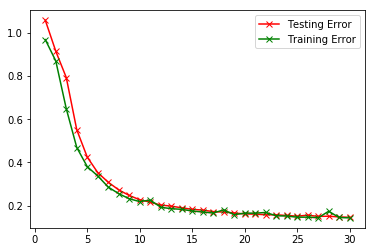

In [195]:


pred = model.predict(X_test)
pred = pred.reshape(614400, 4)
output_images = []
for p in range(len(pred)):
    output_images.append([int(op) for op in kmeans.cluster_centers_[np.argmax(pred[p])]])
y_test_reshaped = y_test.reshape(614400, 4)
y_test_k_color = []
for p in range(len(y_test_reshaped)):
    y_test_k_color.append([int(op) for op in kmeans.cluster_centers_[np.argmax(y_test_reshaped[p])]])
output_images = np.reshape(output_images, (600, 32, 32, 3))
y_test_k_color = np.reshape(y_test_k_color, (600, 32, 32, 3))




plt.figure(figsize=(10, 30))
subplotcount = 1
for i in range(0,10):
    plt.subplot(10, 2, subplotcount)
    subplotcount+=1
    plt.imshow(y_test_k_color[i])
    plt.subplot(10, 2, subplotcount)
    subplotcount+=1
    plt.imshow(output_images[i])
    plt.axis('off')
plt.show()



no_of_epochs = [int(i) for i in range(1, 31)]
plt.plot(no_of_epochs, network.history['loss'], marker = "x", color="r", label = "Testing Error")
plt.plot(no_of_epochs, network.history['val_loss'], marker = "x", color = "g", label = "Training Error")
plt.legend()


